In [1]:
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt
import scipy.stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
numpy 1.19.1
pandas 1.1.1
matplotlib 3.3.1


## mutation martix proc

### read mutation file

In [11]:
mut=pd.read_table('data_ori/CCLE_mutations.csv', sep='\t')
mut.shape
mut.head()

# remove 'isDeleterious' == nan
mut=mut.loc[mut['isDeleterious'].notnull()]
mut['isDeleterious']=mut['isDeleterious'].astype(bool)
# remove 'entrez id' == 0
mut=mut.loc[mut['Entrez_Gene_Id']!=0]
mut.shape
mut['DepMap_ID'].value_counts()

C:\Users\jmjun\anaconda3\envs\SL\lib\site-packages\IPython\core\interactiveshell.py:3337: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(1296237, 34)

,Hugo_Symbol,Entrez_Gene_Id,NCBI_Build,Chromosome,Start_position,End_position,Strand,Variant_Classification,Variant_Type,Reference_Allele,...,ExAC_AF,CGA_WES_AC,SangerWES_AC,SangerRecalibWES_AC,RNAseq_AC,HC_AC,RD_AC,WGS_AC,Variant_annotation,DepMap_ID
0,A1BG,1,37,19,58858743,58858743,+,Missense_Mutation,SNP,C,...,NaN,NaN,20:16,20:16,NaN,NaN,NaN,NaN,other non-conserving,ACH-000986
1,A1BG,1,37,19,58858810,58858810,+,Silent,SNP,C,...,NaN,NaN,10:21,14:23,34:87,NaN,NaN,22:19,silent,ACH-000988
2,A1BG,1,37,19,58858867,58858867,+,Missense_Mutation,SNP,C,...,NaN,NaN,4:9,4:9,NaN,NaN,NaN,NaN,other non-conserving,ACH-002182
3,A1BG,1,37,19,58858872,58858872,+,Missense_Mutation,SNP,C,...,0.000017,NaN,NaN,NaN,NaN,NaN,NaN,9:16,other non-conserving,ACH-000985
4,A1BG,1,37,19,58858914,58858914,+,Missense_Mutation,SNP,C,...,0.000008,27:20,NaN,NaN,NaN,NaN,NaN,NaN,other non-conserving,ACH-001793


(1280610, 34)

ACH-000992    66021
ACH-000786    35499
ACH-000999    25557
ACH-000990    12859
ACH-000996    11100
              ...  
ACH-001187       29
ACH-001214       25
ACH-001188       19
ACH-001092       17
ACH-001150       16
Name: DepMap_ID, Length: 1741, dtype: int64

In [13]:
len(mut['Variant_Classification'].value_counts())

20

### specifiy deterious varient types

In [3]:
# all varient types in CCLE mutation file
all_varient=["3'UTR",
             "5'Flank",
             "5'UTR",
             'De_novo_Start_OutOfFrame',
             'Frame_Shift_Del',
             'Frame_Shift_Ins',
             'IGR',
             'In_Frame_Del',
             'In_Frame_Ins',
             'Intron',
             'Missense_Mutation',
             'Nonsense_Mutation',
             'Nonstop_Mutation',
             'Silent',
             'Splice_Site',
             'Start_Codon_Del',
             'Start_Codon_Ins',
             'Start_Codon_SNP',
             'Stop_Codon_Del',
             'Stop_Codon_Ins']

# deterious varients specified in CCLE mutation file itself
det_varient_C=["3'UTR",
               "5'Flank",
               "5'UTR",
               'De_novo_Start_OutOfFrame',
               'Frame_Shift_Del',
               'Frame_Shift_Ins',
               'IGR',
               'In_Frame_Del',
               'Intron',
               'Nonsense_Mutation',
               'Nonstop_Mutation',
               'Splice_Site',
               'Start_Codon_Del',
               'Start_Codon_Ins',
               'Stop_Codon_Del',
               'Stop_Codon_Ins']

# deterious varients determined based on literature
det_varient_L=['De_novo_Start_OutOfFrame',
               'Frame_Shift_Del',
               'Frame_Shift_Ins',
               'In_Frame_Del',
               'Nonsense_Mutation',
               'Nonstop_Mutation',
               'Splice_Site',
               'Start_Codon_Del',
               'Start_Codon_Ins',
               'Stop_Codon_Del',
               'Stop_Codon_Ins',
               'Missense_Mutation']

### filter deleterious mutation and make cell-gene matrix (value = the number of deleterious mutation)

In [4]:
det_mut=mut.loc[mut['Variant_Classification'].isin(det_varient_L),['DepMap_ID','Entrez_Gene_Id','isDeleterious']]
det_mut['isDeleterious']=True
det_mut.head()
print('# of mutation:', len(det_mut))

det_mut_count=det_mut.groupby(['DepMap_ID','Entrez_Gene_Id'])['isDeleterious'].apply(lambda x: np.sum(x))
det_mut_count=det_mut_count.unstack().fillna(0)
det_mut_count.head()
print('# of genes:', len(det_mut_count.columns))
print('# of cells:', len(det_mut_count.index))

,DepMap_ID,Entrez_Gene_Id,isDeleterious
0,ACH-000986,1,True
2,ACH-002182,1,True
3,ACH-000985,1,True
4,ACH-001793,1,True
5,ACH-000865,1,True


# of mutation: 867873


Entrez_Gene_Id,1,2,9,10,12,13,14,15,16,18,...,100996928,100996939,101055625,101059918,101059953,101060200,101243544,101362076,101730217,101928601
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ACH-000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


# of genes: 18764
# of cells: 1741


### attach cancer type to each cell line

In [5]:
sample_info=pd.read_table('data_ori/sample_info.csv', sep=',', index_col=0)
cancer=sample_info['primary_disease']

det_mut_count_with_cancer=pd.merge(det_mut_count,cancer, how='left', left_index=True, right_index=True)
det_mut_count_with_cancer.fillna('unknown', inplace=True)
det_mut_count_with_cancer.head()
det_mut_count_with_cancer.shape

,1,2,9,10,12,13,14,15,16,18,...,100996939,101055625,101059918,101059953,101060200,101243544,101362076,101730217,101928601,primary_disease
DepMap_ID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ovarian Cancer
ACH-000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Leukemia
ACH-000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Colon/Colorectal Cancer
ACH-000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Leukemia
ACH-000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Leukemia


(1741, 18765)

### # of genes having deleterious mutations more than 5% of cell lines for a specific cancer

Lung Cancer                   266
Leukemia                      131
Skin Cancer                   109
Lymphoma                      108
Brain Cancer                  103
Colon/Colorectal Cancer        78
Head and Neck Cancer           75
Ovarian Cancer                 73
Bone Cancer                    72
Breast Cancer                  66
Pancreatic Cancer              56
Kidney Cancer                  52
Gastric Cancer                 47
Neuroblastoma                  46
Unknown                        44
Fibroblast                     42
Endometrial/Uterine Cancer     39
Bladder Cancer                 39
Esophageal Cancer              38
Sarcoma                        37
Bile Duct Cancer               36
Myeloma                        34
Liver Cancer                   27
Cervical Cancer                22
Thyroid Cancer                 21
Rhabdoid                       20
Prostate Cancer                13
Liposarcoma                    11
Eye Cancer                      9
Engineered    

1741

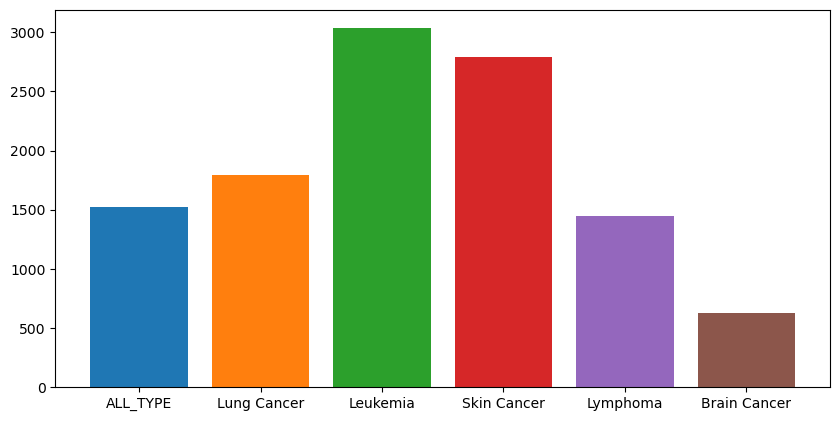

In [7]:
fig=plt.figure(figsize=(10,5), dpi=100)
ax=fig.subplots()

cancer_count=det_mut_count_with_cancer['primary_disease'].value_counts(dropna=False)
cancer_count
cancer_count.sum()

min_mut_perc=0.05
top_cancer=cancer_count.index[:5]
for ii, can in enumerate(['ALL_TYPE']+list(top_cancer)):
    if can=='ALL_TYPE':
        mut_count_of_cancer=det_mut_count_with_cancer.copy()
    else:
        mut_count_of_cancer=det_mut_count_with_cancer.loc[det_mut_count_with_cancer['primary_disease']==can]
        
    mut_count_of_cancer=mut_count_of_cancer.drop(columns='primary_disease')
    mut_sum_per_gene=np.sum(mut_count_of_cancer!=0, axis=0)
    mut_perc_per_gene=mut_sum_per_gene/len(mut_count_of_cancer.index)
    _=ax.bar(ii, np.sum(mut_perc_per_gene>=min_mut_perc))

_=ax.set_xticks(range(len(['ALL_TYPE']+list(top_cancer))))
_=ax.set_xticklabels(['ALL_TYPE']+list(top_cancer))

### save the det_mut_count_with_cancer file

In [8]:
print('# of nan: ', det_mut_count_with_cancer.isnull().sum().sum()) # not containing nan
det_mut_count_with_cancer.to_csv('data_preproc/mut_varL.txt',sep='\t')

# of nan:  0
